In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score, mean_squared_error,mean_absolute_percentage_error,r2_score
import talib
from sklearn.model_selection import train_test_split

In [2]:
data=yf.download('^HSI','2019-01-01','2022-01-01')
# data.drop('Volume',1,inplace=True)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,25824.439453,25824.439453,25055.269531,25130.349609,25130.349609,1666316400
2019-01-03,25077.679688,25262.210938,24896.869141,25064.359375,25064.359375,1481291700
2019-01-04,24946.119141,25626.029297,24924.730469,25626.029297,25626.029297,1708572100
2019-01-07,26015.839844,26043.640625,25753.460938,25835.699219,25835.699219,1447090300
2019-01-08,25852.500000,25960.890625,25688.500000,25875.449219,25875.449219,1578205700
...,...,...,...,...,...,...
2021-12-24,23375.990234,23383.189453,23186.570312,23223.759766,23223.759766,622879700
2021-12-28,23282.349609,23319.439453,23099.480469,23280.560547,23280.560547,1433026700
2021-12-29,23253.980469,23253.980469,23008.279297,23086.539062,23086.539062,828414400


In [3]:

data['Prediction']=data['Close'].shift(-1)
data.dropna(inplace=True)

In [4]:
# data.drop(['OSC12','OSC6','MI12','MI6','%R10','%R5','RSI','TR'],1,inplace=True)
data_val=data[-100:]
data=data[:-100]
sc = MinMaxScaler(feature_range = (-1, 1))
# X=sc.fit_transform(data.drop('Prediction',1))
X=data.drop('Prediction',1).values
# Y = data["Prediction"].values.reshape(-1,1)
# Y = sc_y.fit_transform(data["Prediction"].values.reshape(-1,1))
Y=np.array(data["Prediction"])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,shuffle=False)
# X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
# X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(512, 6) (512,) (128, 6) (128,)


/var/folders/8h/w0jn89bj2w5g85gj4ck7w0t00000gn/T/ipykernel_41172/2761118840.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=data.drop('Prediction',1).values


In [5]:
clf = RandomForestRegressor()

In [6]:
model = clf.fit(X_train, y_train)

In [7]:
y_pred=model.predict(X_test)

In [8]:
y_pred

array([28661.54898438, 28419.05894531, 29196.04939453, 29074.73595703,
       29022.28625   , 29060.79884766, 29035.42242187, 28983.88568359,
       29444.77871094, 29859.99458984, 29547.32507812, 29858.96636719,
       29846.14265625, 29865.29445312, 29858.96636719, 29870.78777344,
       29870.78777344, 29889.81201172, 29994.31816406, 28791.94511719,
       29468.72445312, 28980.04482422, 29770.0378125 , 28967.29900391,
       29219.80728516, 28535.08433594, 28820.63642578, 28830.3528125 ,
       29313.48322266, 28537.7378125 , 28990.78925781, 28916.65324219,
       28948.2771875 , 29414.81804687, 28800.00984375, 28905.47962891,
       28534.16576172, 28075.29314453, 27948.63955078, 28086.47339844,
       28271.45373047, 28670.55539062, 28419.16050781, 28946.4734375 ,
       28496.58605469, 29139.13230469, 28488.16605469, 28351.15708984,
       28483.83789062, 28948.04132813, 28824.55988281, 29001.75878906,
       28919.29636719, 28939.92423828, 28746.05501953, 28787.14732422,
      

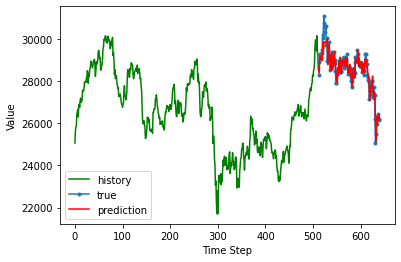

In [9]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [10]:
mean_absolute_percentage_error(y_test,y_pred)

0.0113493849014258

In [11]:
mean_squared_error(y_test,y_pred)

171280.0524290682

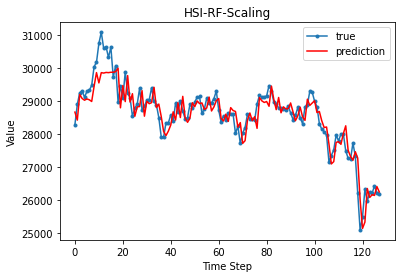

In [12]:
# y_test = sc.inverse_transform(y_test)
# y_pred = sc.inverse_transform(y_pred)
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.title('HSI-RF-Scaling')
plt.legend()
plt.show();

In [13]:
mean_absolute_percentage_error(y_test,y_pred)

0.0113493849014258

In [14]:
mean_squared_error(y_test,y_pred,squared=False)

413.85994301100004

In [15]:
r2_score(y_test,y_pred)

0.8376536778344625

In [16]:
x_val=data_val.drop('Prediction',1)
y_val=data_val['Prediction']
# x_val=x_val.reshape(x_val.shape[0],1,x_val.shape[1])
# x_val=sc.transform(x_val).reshape(x_val.shape[0],1,x_val.shape[1])
y_val_pred=clf.predict(x_val)
# y_val_pred=sc_y.inverse_transform(y_val_pred)

/var/folders/8h/w0jn89bj2w5g85gj4ck7w0t00000gn/T/ipykernel_41172/2115332834.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_val=data_val.drop('Prediction',1)
/opt/homebrew/Caskroom/miniforge/base/envs/fyp_new/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


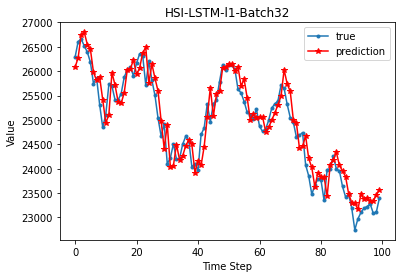

In [17]:
plt.plot(y_val.values, marker='.', label="true")
plt.plot(y_val_pred, 'r', marker='*',label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.title('HSI-LSTM-l1-Batch32')
plt.legend()
plt.show()

In [18]:
mean_absolute_percentage_error(y_val,y_val_pred)

0.010732788212234277

In [19]:
mean_squared_error(y_val,y_val_pred,squared=False)

324.762932608059

In [20]:
r2_score(y_val,y_val_pred)

0.8954815550987023